# House Price Prediction

### Prodigy Infotech
##### Intership Task 1

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.



Dataset : - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
xtrain=pd.read_csv("train.csv")
xtest=pd.read_csv("test.csv")

In [3]:
xtrain.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
xtest.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [5]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
xtrain.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [7]:
xtrain.describe(include=object).T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

### Exploratory Data Analysis

### Train Data

In [8]:
df=xtrain.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.isnull().sum()[df.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
df.isnull().sum()[df.isnull().sum()!=0]/df.shape[0]*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [12]:
# LotFrontage
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [13]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [14]:
# null values of LotFrontage imputed with median after grouping by neighbourhood. 
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [15]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [16]:
# null values imputed with 'noaccess'
df['Alley'] = df['Alley'].fillna('noaccess')

In [17]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [18]:
# null values in 'MasVnrType' with the highest occuring value. i.e None 
df['MasVnrType']=df['MasVnrType'].fillna('None')

In [19]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [20]:
# null values imputed with median 
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [21]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [22]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [23]:
df['BsmtExposure'].unique()    

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [24]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [25]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

Na imputed with 'Nobasement'

In [26]:
df['BsmtQual']=df['BsmtQual'].fillna('Nobasement')

In [27]:
df['BsmtCond']=df['BsmtCond'].fillna('Nobasement')

In [28]:
df['BsmtExposure']=df['BsmtExposure'].fillna('Nobasement')

In [29]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna('Nobasement')

In [30]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna('Nobasement')

In [31]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [32]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [33]:
# null value imputed with mode 
df['Electrical']=df['Electrical'].fillna('SBrkr')

In [34]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [35]:
# Na imputed with 'Nofireplace'
df['FireplaceQu']=df['FireplaceQu'].fillna('Nofireplace')

In [36]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [37]:
# Na imputed with 'Nogarage'
df['GarageType']=df['GarageType'].fillna('NoGarage')

In [38]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [39]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [40]:
df['GarageYrBlt']=df['GarageYrBlt'].astype(object)

In [41]:
# Na imputed with 'nogarage'
df['GarageYrBlt']=df['GarageYrBlt'].fillna('nogarage')

In [42]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [43]:
# Na imputed with 'nogarage'
df['GarageFinish']=df['GarageFinish'].fillna('nogarage')

In [44]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [45]:
# Na imputed with 'nogarage'
df['GarageQual']=df['GarageQual'].fillna('nogarage')

In [46]:
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [47]:
# Na imputed with 'nogarage'
df['GarageCond']=df['GarageCond'].fillna('nogarage')

In [48]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [49]:
# Na imputed with 'nopool'
df['PoolQC']=df['PoolQC'].fillna('nopool')

In [50]:
df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [51]:
# Na imputed with 'nofence'
df['Fence']=df['Fence'].fillna('nofence')

In [52]:
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [53]:
df['MiscFeature']=df['MiscFeature'].fillna('None')

In [54]:
df.isnull().sum()[df.isnull().sum()!=0]/df.shape[0]*100

Series([], dtype: float64)

In [55]:
(((df.isnull().sum())/df.shape[0])*100)[(((df.isnull().sum())/df.shape[0])*100)!=0]

Series([], dtype: float64)

In [56]:
dfnew=df.drop('Id', axis=1)

In [57]:
catdf=dfnew.select_dtypes(include=object)
numdf=dfnew.select_dtypes(exclude=object)

### Univariate Analysis

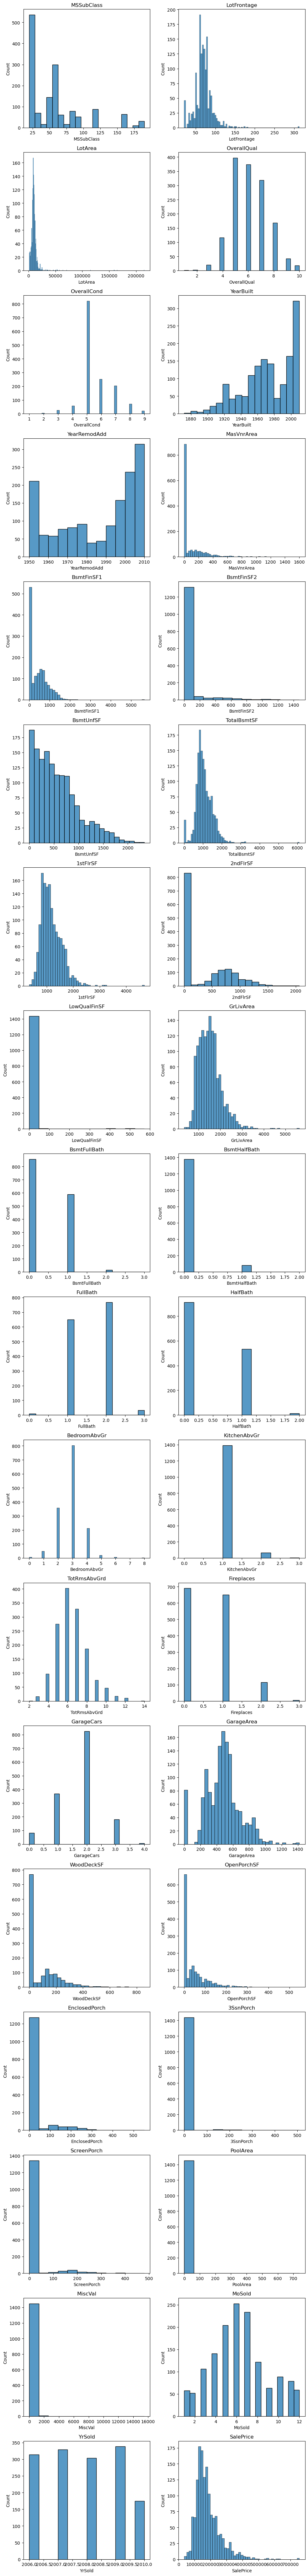

In [58]:
plt.figure(figsize=(10,100))
re=1
for i in numdf.columns:
    plt.subplot(22,2,re)
    sns.histplot(data=df, x=numdf[i])
    plt.title(i)
    re+=1
plt.tight_layout()
plt.show()

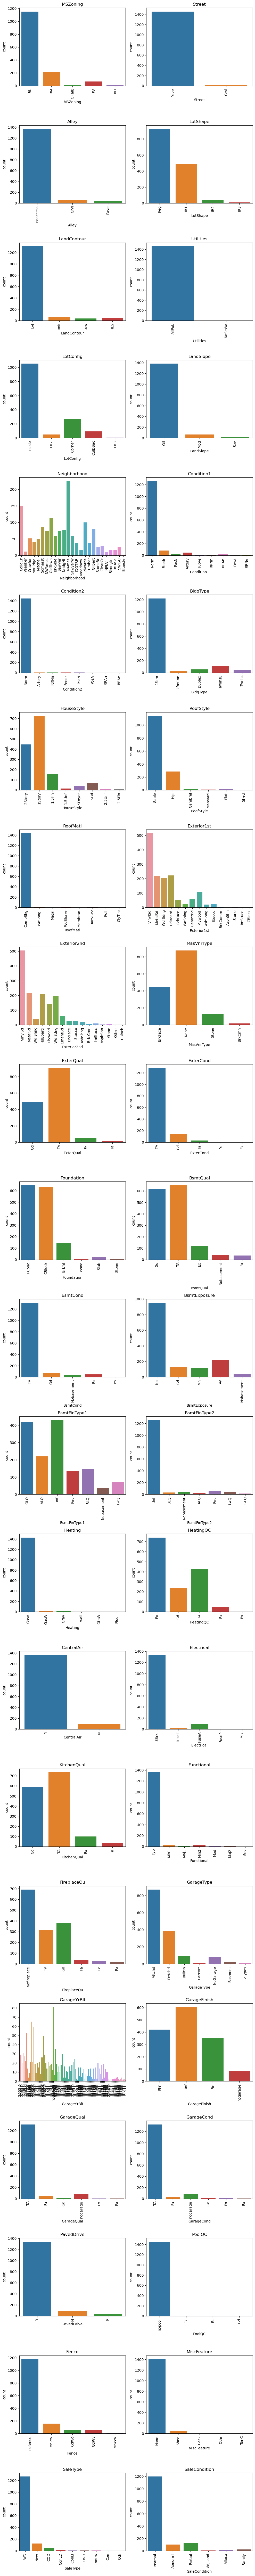

In [59]:
plt.figure(figsize=(10,100))
re=1
for i in catdf.columns:
    plt.subplot(22,2,re)
    sns.countplot(data=df, x=catdf[i])
    plt.title(i)
    plt.xticks(rotation=90)
    re+=1
plt.tight_layout()
plt.show()

### Bivariate Analysis

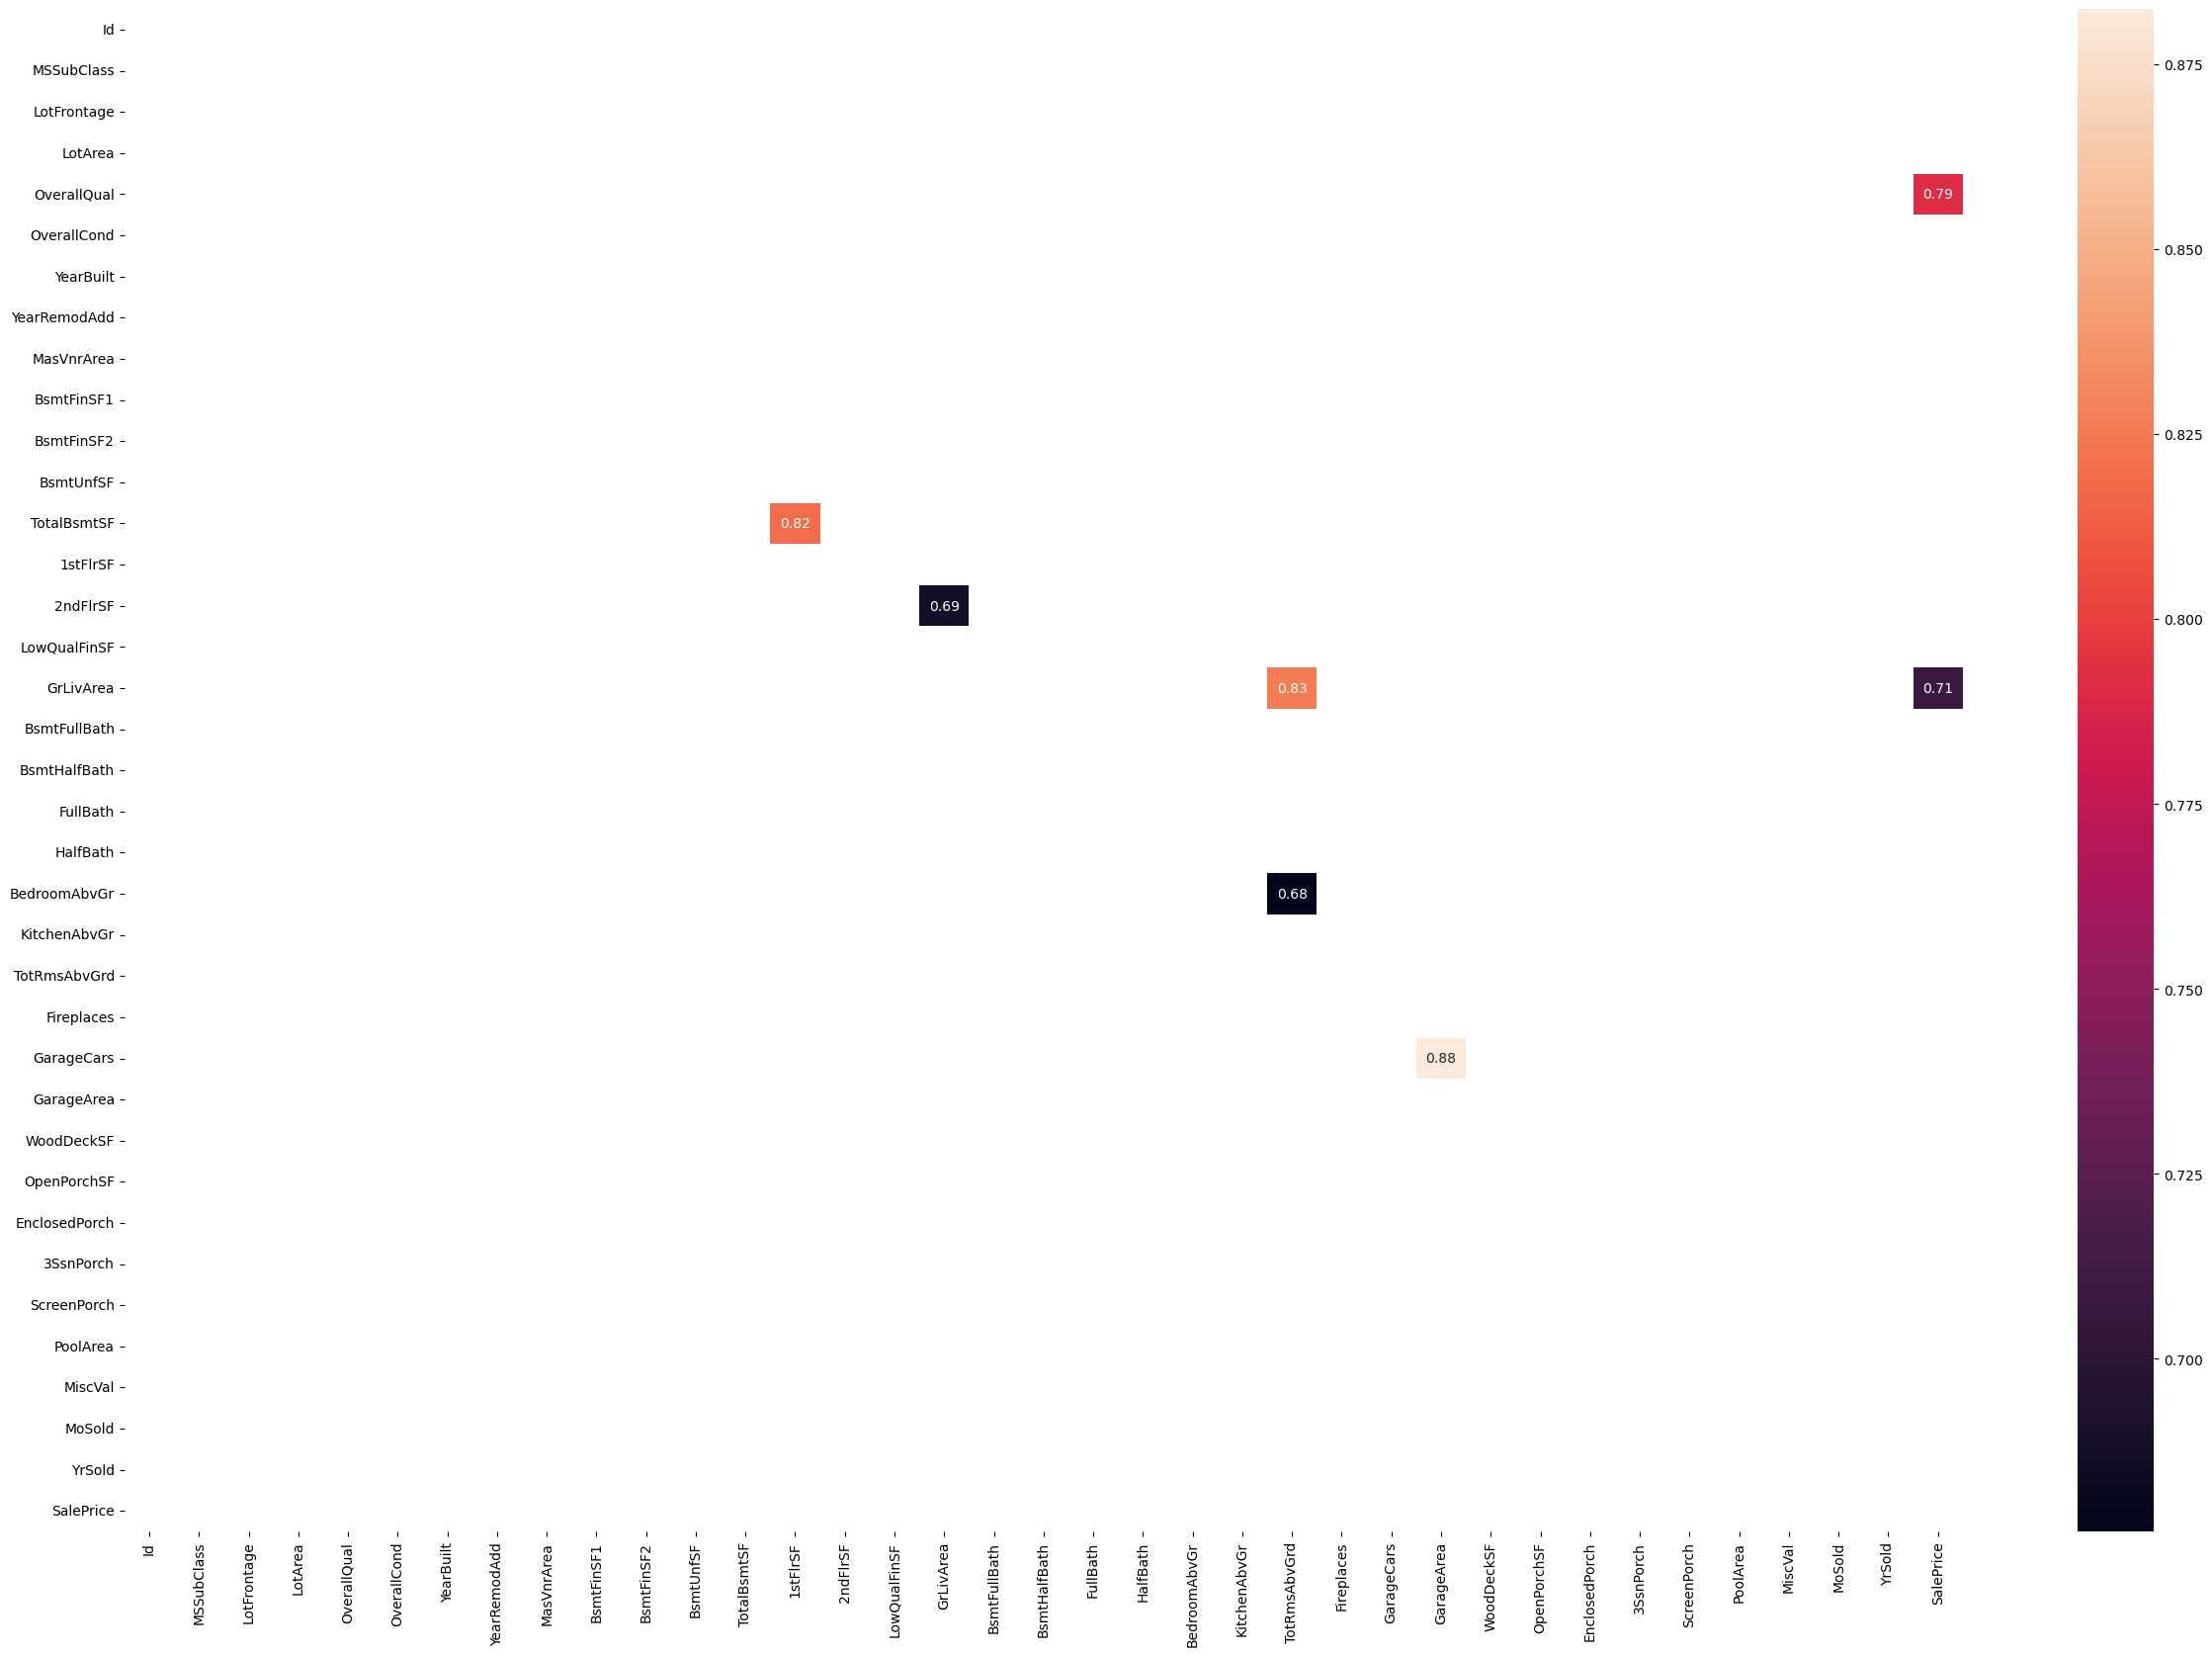

In [60]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr()[(df.corr()>0.65) | (df.corr()<-0.65)],annot=True, mask=np.tril(df.corr()))
plt.show()

### Numerical Columns vs SalePrice

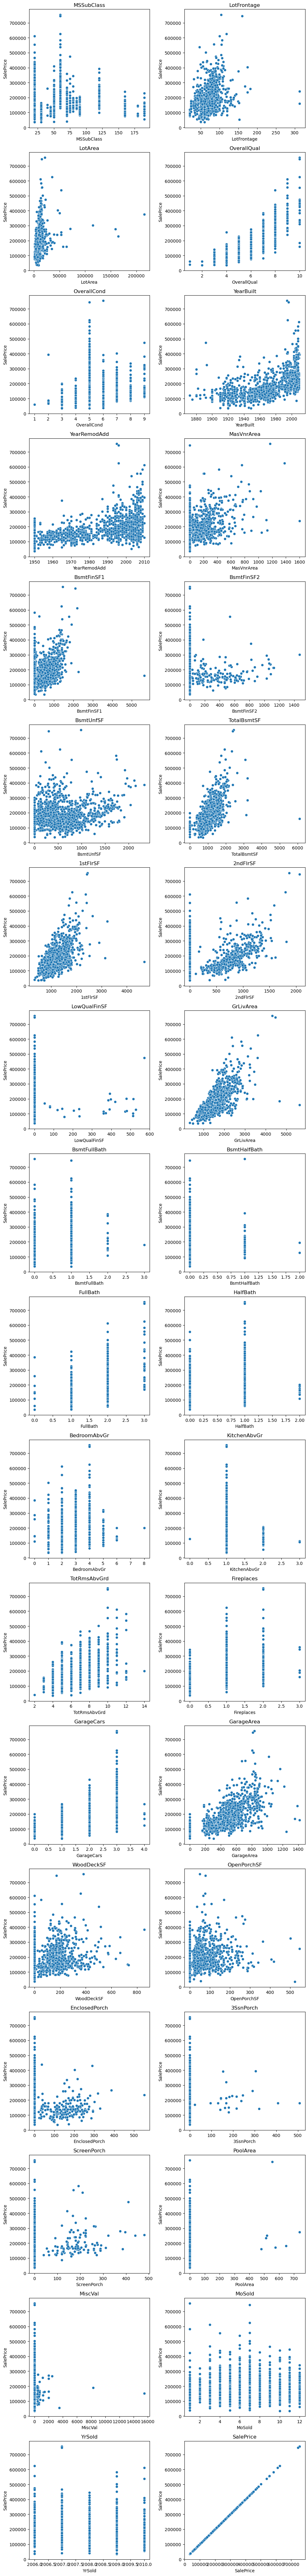

In [61]:
plt.figure(figsize=(10,100))
re=1
for i in numdf.columns:
    plt.subplot(22,2,re)
    sns.scatterplot(data=df, x=numdf[i], y=df['SalePrice'])
    plt.title(i)
    re+=1
plt.tight_layout()
plt.show()

### Categorical Columns vs SalePrice

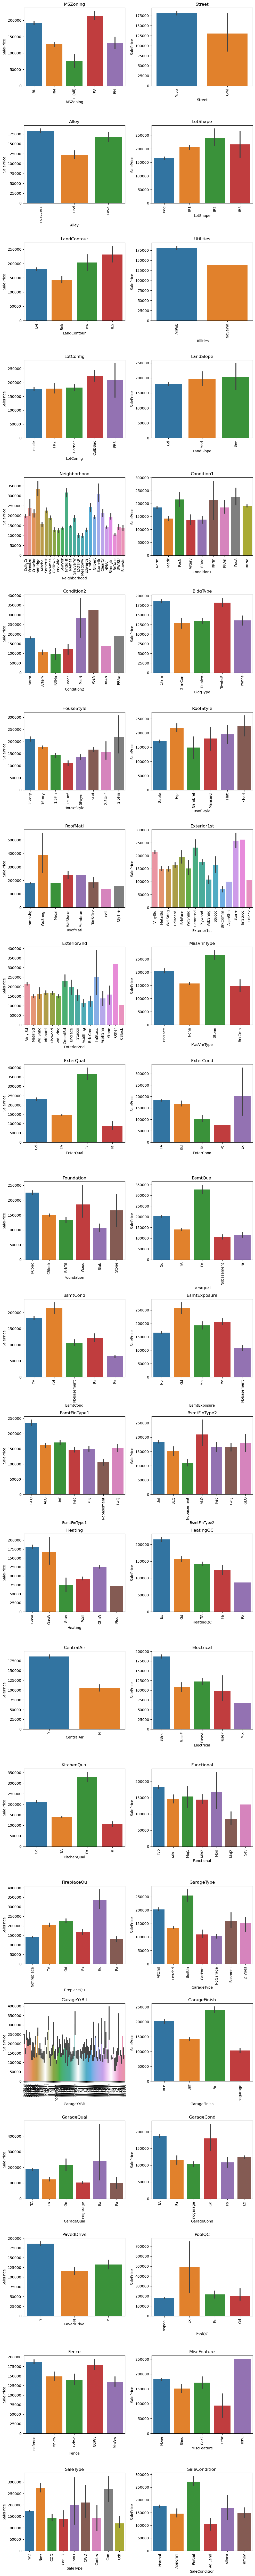

In [62]:
plt.figure(figsize=(10,100))
re=1
for i in catdf.columns:
    plt.subplot(22,2,re)
    sns.barplot(data=catdf,x=catdf[i],y=df['SalePrice'])
    plt.title(i)
    plt.xticks(rotation=90)
    re+=1
plt.tight_layout()
plt.show()

### Outlier Treatment 

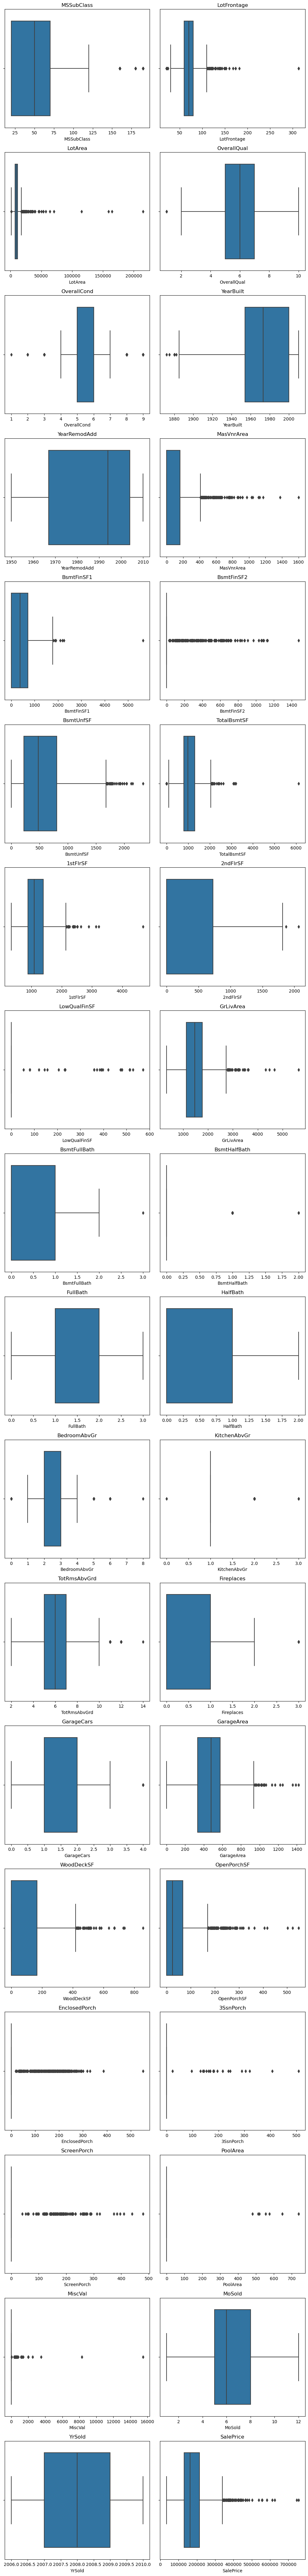

In [63]:
plt.figure(figsize=(10,100))
re=1
for i in numdf.columns:
    plt.subplot(22,2,re)
    sns.boxplot(data=df, x=numdf[i])
    plt.title(i)
    re+=1
plt.tight_layout()
plt.show()

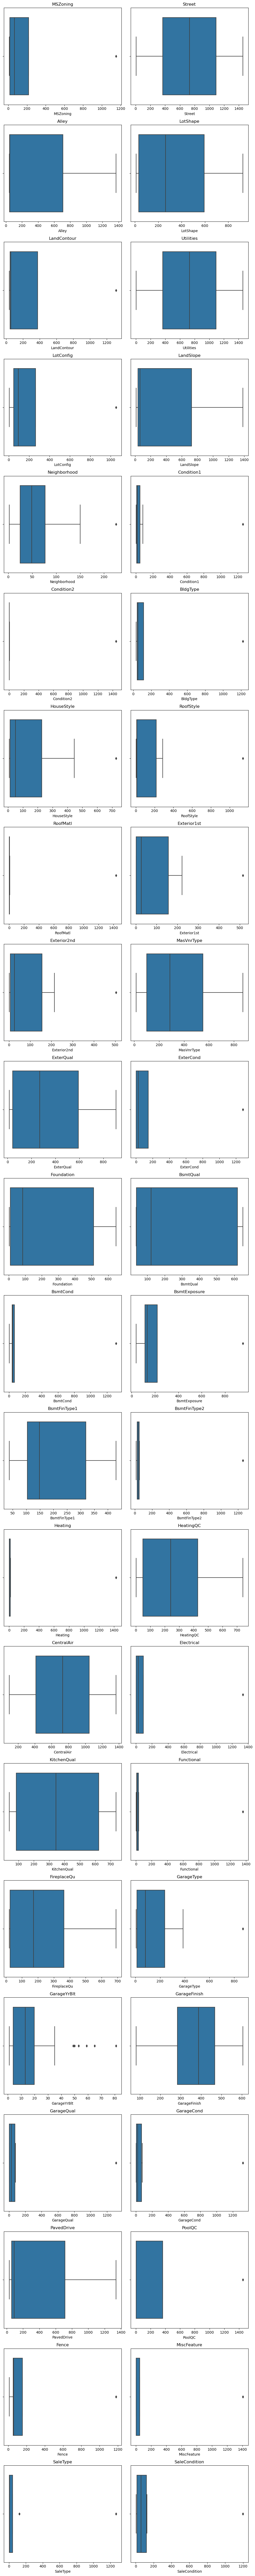

In [64]:
plt.figure(figsize=(10,100))
re=1
for i in catdf.columns:
    plt.subplot(22,2,re)
    sns.boxplot(data=df, x=catdf[i].value_counts())
    plt.title(i)
    re+=1
plt.tight_layout()
plt.show()

### Description from the train data 

In [65]:
# mssubclass has high count around 25
# lotfrontage is high around 60
# overquality and overallcondition of the houses peaks aorund 5 years 
# houses build after 2000 is the highest in the data 
# No masvnrarea houses are the highest
# Houses with no basement are high
# houses with 2 full baths are high in count 
# houses with 3 bedrooms are high in the data
# houses with one kitchen above the ground is the highest 
# houses with 6 rooms above the groud is the highest 
# houses with no fire places are high in count 
# houses with 2 garage cars is high in count 
# Garage area in houses are high around 500 
# most of the houses has no openporch and 3ssnporch
# houses with nno screenporuch, pool area, miscellanous features and fence are high in count.  
# Houses in the RL zoning is high in count 
# most of the houses in the data are in pave street type\
# high number of houses in the data has no access to alley 
# Lotshape of the houses are high in Reg follewd by IR2
# landcounter is high in lvl and most of the houses utilities belongs to allpub 
# lotconfig is high in inside category followed by corner houses 
# high number of houses are in NAmes followed by Collegr
# most of the houses belong to the buildertype of 1fam.
# housestyle is high in onestrory and roofstyle count peaks at Gable. 
# Houses with TA basement quality is the highest followed by good quality basement 
# Most of the houses has GasA heating and excellent Heating Quality 
# Most of the houses has central air 
# and the SBrKr electricl system is the famous among the houses in the data 
# Most of the houses has Ta kitchen quality followed by good. 
# and most of the houses are functional type 
# high number of houses has no fireplace 
# high number of houses has attached garage and no pool in the house 
# most of the houses has no fence 
# the hishest sale type is WD 
# and finally the highest salecondition is normal 
# price is related to lotfrontage,overallquality of the house , yearbuilt, 
   # groundlivingarea,totalrooms in the house and  garage area. 
# average saleprice of house is high with FV MSZ zoning, pave steet, no acces to alley, 
    #  IR2 lotshape, HLS landcontour, ALLpub utilities, RF3lotconfig, Sev landslpo. 
# the houses with PConc foundation has high prices. 
# the houses with excellent basement  has high prices. 
# the houses with excellent heatingquality  has high prices. 
# the prices of houses which are partially build are high. 

## Test data

In [66]:
dftest=xtest.copy()

In [67]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [68]:
dftest.isnull().sum()[dftest.isnull().sum()!=0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [69]:
dftest['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [70]:
# impute the mszoning with mode 
dftest['MSZoning']=dftest['MSZoning'].fillna('RL')

In [71]:
dftest['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [72]:
dftest['Alley'] = dftest['Alley'].fillna('noaccess')

In [73]:
dftest['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [74]:
dftest['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [75]:
dftest['Utilities'] = dftest['Utilities'].fillna('AllPub')

In [76]:
dftest['Exterior1st'].value_counts() 

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [77]:
dftest['Exterior1st'] = dftest['Exterior1st'].fillna('VinylSd')

In [78]:
dftest['Exterior2nd'].value_counts() 

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [79]:
dftest['Exterior2nd'] = dftest['Exterior2nd'].fillna('VinylSd')

In [80]:
dftest['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [81]:
dftest['MasVnrType'] = dftest['MasVnrType'].fillna('None')

In [82]:
dftest['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [83]:
dftest['BsmtQual']=dftest['BsmtQual'].fillna('Nobasement')

In [84]:
dftest[(dftest['BsmtQual']=='Nobasement') & (dftest['BsmtCond'].isnull())]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
125   1586          30       RL         67.0     8777   Pave  noaccess   
133   1594          90       RH         60.0     7200   Pave      Pave   
269   1730          90       RL         75.0     8250   Pave  noaccess   
318   1779          20       RL         75.0     9533   Pave  noaccess   
354   1815          30       RM         50.0     5925   Pave  noaccess   
387   1848          20       RL          NaN     9000   Pave  noaccess   
388   1849          20       RL          NaN    15635   Pave  noaccess   
396   1857          70       RL        120.0    26400   Pave  noaccess   
397   1858          90       RL         64.0     7018   Pave  noaccess   
398   1859          90       RL         64.0     7018   Pave  noaccess   
400   1861          90       RL         64.0     7007   Pave  noaccess   
455   1916          30       RL        109.0    21780   Grvl  noaccess   
590   2051          20       RL         74.0     7785   Pave  noaccess   
606   2067          20       RL         71.0     8838   Pave  noaccess   
608   2069          20       RL         60.0    10122   Pave  noaccess   
660   2121          20       RM         99.0     5940   Pave  noaccess   
662   2123          30       RM          NaN     6120   Pave  noaccess   
728   2189          20       RL        123.0    47007   Pave  noaccess   
729   2190          90       RL         65.0     6012   Pave  noaccess   
730   2191          90       RL         74.0     6845   Pave  noaccess   
733   2194          50       RL         57.0     8050   Pave  noaccess   
756   2217          20       RL         80.0    14584   Pave  noaccess   
764   2225          90       RL         76.0    10260   Pave  noaccess   
927   2388          90       RL          NaN    10899   Pave  noaccess   
975   2436          20       RL         70.0     7000   Pave  noaccess   
992   2453          20       RM         52.0     8626   Pave  noaccess   
993   2454          80       RM         76.0    11800   Pave  noaccess   
1030  2491          20       RL          NaN     9000   Pave  noaccess   
1038  2499          30       RL          NaN    11515   Pave  noaccess   
1087  2548          90       RL          NaN     9555   Pave  noaccess   
1092  2553          90       RL         74.0     6882   Pave  noaccess   
1104  2565          20       RL        126.0    13108   Pave  noaccess   
1118  2579          50       RM         64.0    11067   Pave  noaccess   
1139  2600          20       RL        200.0    43500   Pave  noaccess   
1242  2703          90       RM         68.0     8927   Pave  noaccess   
1303  2764          20       RL         86.0    11650   Pave  noaccess   
1306  2767          90       RL         60.0     8544   Pave  noaccess   
1343  2804          20       RL        100.0    21370   Pave  noaccess   
1344  2805          30       RL         55.0     8250   Pave  noaccess   
1364  2825          20       RL         80.0    12048   Pave  noaccess   
1431  2892          30  C (all)         69.0    12366   Pave  noaccess   
1444  2905          20       RL        125.0    31250   Pave  noaccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
125       Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
133       Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
269       Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
318       Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
354       Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
387       Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
388       IR1         Lvl    AllPub  ...         110        0    NaN    NaN   
396       Reg         Bnk    AllPub  ...           0        0    NaN    NaN   
397       Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
398       Reg         Bnk    AllPub

In [85]:
dftest['BsmtCond']=dftest['BsmtQual'].fillna('Nobasement')

In [86]:
dftest['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [87]:
dftest['BsmtExposure']=dftest['BsmtExposure'].fillna('No')

In [88]:
dftest['BsmtFinType1'].unique()

array(['Rec', 'ALQ', 'GLQ', 'Unf', 'BLQ', 'LwQ', nan], dtype=object)

In [89]:
dftest['BsmtFinType1']=dftest['BsmtFinType1'].fillna('Nobasement')

In [90]:
dftest['BsmtFinSF1'].unique()

array([ 468.,  923.,  791.,  602.,  263.,    0.,  935.,  637.,  804.,
       1051.,  156.,  300.,  514.,  110.,   28., 1373.,  578.,   24.,
         16.,  326., 1414.,  126.,  250., 1129., 1298.,  280.,  368.,
        376.,  466.,  244., 1032.,  484.,  833.,  506., 1137.,  687.,
        329.,  698., 1059., 1010., 1500.,  670.,  944., 1188.,  856.,
        936.,  734.,  339.,  648.,  532.,  481.,  588.,  717.,   48.,
        579.,  274.,  780.,  176.,  283.,  788.,  474.,  188.,  452.,
        264.,  360.,  276.,  448.,  960.,  766., 1026.,   73.,  736.,
        704.,  240.,  775., 1319.,  267., 1092.,  964.,  288.,  104.,
        192.,  954., 1346., 1433.,  860.,  870.,  353.,  198.,  480.,
       1682.,  672., 1070.,  528.,  133.,  238.,  426.,  375.,  343.,
        747.,   76.,  308.,  615.,  679.,   78.,   42.,  915.,  294.,
        469.,  207.,  458.,  476., 1341.,  564.,  844.,  847.,  850.,
        284., 1965.,  341.,  741.,  189.,  600.,  400.,  363.,  832.,
        622.,  225.,

In [91]:
dftest['BsmtFinSF1']=dftest['BsmtFinSF1'].fillna(0)

In [92]:
dftest['BsmtFinSF2'].unique()

array([ 144.,    0.,   78.,  859.,  981.,   42.,   46.,  162.,  174.,
        350.,  263., 1073.,   12.,  159.,  474.,  453.,  684.,  387.,
        688.,  252.,  590.,  284.,  276.,  168.,  294.,  622.,  113.,
       1526.,  360.,  774.,  364.,  596.,  884.,   92.,  216.,  136.,
        147.,  201.,  512.,  247.,  202.,  483.,  750.,   60.,  102.,
         95.,   63.,  262.,  393.,  286.,  450.,   72.,  243.,  694.,
        875.,  507.,  435.,  419.,  250.,  116.,  624.,   76.,  270.,
        110.,  288.,  186.,  449.,   48.,  613.,  495.,  852.,  555.,
        799.,  811.,  842.,  670.,  382.,  456.,  308.,   52.,  196.,
        128.,  488.,  319.,  273.,   nan,  240.,  956.,  723.,  120.,
        679.,   40.,  121.,  604.,  153.,  619.,    6.,  351., 1037.,
        829.,  264.,   38.,  206.,  167.,  543.,  259.,  404.,  138.,
        955.,  691.,  354.,   66.,  154.,  442.,  448.,  210.,  227.,
        398.,  127.,  722.,  761.,  529.,  522.,  873.,  891.,  755.,
        321.,  915.,

In [93]:
dftest['BsmtFinType2']=dftest['BsmtFinType2'].fillna(0)

In [94]:
dftest['LotFrontage'] = dftest.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [95]:
dftest['MasVnrArea']=dftest['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [96]:
dftest['BsmtFinSF2']=dftest['BsmtFinSF2'].fillna(0)

In [97]:
dftest['BsmtUnfSF']=dftest['BsmtUnfSF'].fillna(dftest['BsmtUnfSF'].median())

In [98]:
dftest['TotalBsmtSF']=dftest['TotalBsmtSF'].fillna(dftest['TotalBsmtSF'].median())

In [99]:
dftest['BsmtFullBath']=dftest['BsmtFullBath'].fillna(dftest['BsmtFullBath'].median())

In [100]:
dftest['BsmtHalfBath']=dftest['BsmtHalfBath'].fillna(dftest['BsmtHalfBath'].median())

In [101]:
dftest['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [102]:
dftest['KitchenQual']=dftest['KitchenQual'].fillna('TA')

In [103]:
dftest['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [104]:
dftest['Functional']=dftest['Functional'].fillna('Typ')

In [105]:
dftest['FireplaceQu'].value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [106]:
dftest['FireplaceQu']=dftest['FireplaceQu'].fillna('Nofireplace')

In [107]:
dftest['GarageType']=dftest['GarageType'].fillna('NoGarage')

In [108]:
dftest['GarageYrBlt']=dftest['GarageYrBlt'].astype(object)

In [109]:
dftest['GarageYrBlt']=dftest['GarageYrBlt'].fillna('NoGarage')

In [110]:
dftest['GarageFinish']=dftest['GarageFinish'].fillna('NoGarage')

In [111]:
dftest['GarageCars']=dftest['GarageCars'].fillna(dftest['GarageCars'].median())

In [112]:
dftest['GarageArea']=dftest['GarageArea'].fillna(0)

In [113]:
dftest['GarageQual']=dftest['GarageQual'].fillna('NoGarage')

In [114]:
dftest['GarageCond']=dftest['GarageCond'].fillna('NoGarage')

In [115]:
dftest['PoolQC']=dftest['PoolQC'].fillna('nopool')

In [116]:
dftest['Fence']=dftest['Fence'].fillna('nofence')

In [117]:
dftest['MiscFeature']=dftest['MiscFeature'].fillna('None')

In [118]:
dftest['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [119]:
dftest['SaleType']=dftest['SaleType'].fillna('WD')

In [120]:
dftest.isnull().sum()[dftest.isnull().sum()!=0]

Series([], dtype: int64)

### Final Train data 

In [121]:
a=df.skew()
b=a[(a>1.5) | (a<-1.5)]
b

LotFrontage       2.212959
LotArea          12.207688
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
TotalBsmtSF       1.524255
LowQualFinSF      9.011341
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
SalePrice         1.882876
dtype: float64

In [122]:
# Log transformation for columns with positive skewness
train=df.drop('SalePrice', axis=1)
for i in b.index:
    train[i] = np.log1p(df[i])

In [123]:
train.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street     Alley LotShape  \
0   1          60       RL     4.189655  9.042040   Pave  noaccess      Reg   
1   2          20       RL     4.394449  9.169623   Pave  noaccess      Reg   
2   3          60       RL     4.234107  9.328212   Pave  noaccess      IR1   
3   4          70       RL     4.110874  9.164401   Pave  noaccess      IR1   
4   5          60       RL     4.442651  9.565284   Pave  noaccess      IR1   

  LandContour Utilities  ... PoolArea  PoolQC    Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...      0.0  nopool  nofence        None     0.0   
1         Lvl    AllPub  ...      0.0  nopool  nofence        None     0.0   
2         Lvl    AllPub  ...      0.0  nopool  nofence        None     0.0   
3         Lvl    AllPub  ...      0.0  nopool  nofence        None     0.0   
4         Lvl    AllPub  ...      0.0  nopool  nofence        None     0.0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal  12.247699  
1      5   2007        WD         Normal  12.109016  
2      9   2008        WD         Normal  12.317171  
3      2   2006        WD        Abnorml  11.849405  
4     12   2008        WD         Normal  12.429220  

[5 rows x 81 columns]

### Final Test data 

In [124]:
a=dftest.skew()
b=a[(a>1.5) | (a<-1.5)]
b

LotArea           3.115217
MasVnrArea        2.549569
BsmtFinSF2        4.042954
1stFlrSF          1.558195
LowQualFinSF     16.167254
BsmtHalfBath      3.782976
KitchenAbvGr      4.079055
WoodDeckSF        2.130760
OpenPorchSF       2.687779
EnclosedPorch     4.669172
3SsnPorch        12.524216
ScreenPorch       3.788244
PoolArea         20.196888
MiscVal          20.075188
dtype: float64

In [125]:
test = dftest.copy()
for i in b.index:
    test[i] = np.log1p(dftest[i])

In [126]:
test.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street     Alley LotShape  \
0  1461          20       RH         80.0  9.360741   Pave  noaccess      Reg   
1  1462          20       RL         81.0  9.565775   Pave  noaccess      IR1   
2  1463          60       RL         74.0  9.534668   Pave  noaccess      IR1   
3  1464          60       RL         78.0  9.208238   Pave  noaccess      IR1   
4  1465         120       RL         43.0  8.518392   Pave  noaccess      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea  PoolQC    Fence  \
0         Lvl    AllPub  ...    4.795791      0.0  nopool    MnPrv   
1         Lvl    AllPub  ...    0.000000      0.0  nopool  nofence   
2         Lvl    AllPub  ...    0.000000      0.0  nopool    MnPrv   
3         Lvl    AllPub  ...    0.000000      0.0  nopool  nofence   
4         HLS    AllPub  ...    4.976734      0.0  nopool  nofence   

  MiscFeature   MiscVal MoSold  YrSold  SaleType  SaleCondition  
0        None  0.000000      6    2010        WD         Normal  
1        Gar2  9.433564      6    2010        WD         Normal  
2        None  0.000000      3    2010        WD         Normal  
3        None  0.000000      6    2010        WD         Normal  
4        None  0.000000      1    2010        WD         Normal  

[5 rows x 80 columns]

### Label Encoding the train and test data

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
concdf=pd.concat([train,test])
concdf.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street     Alley LotShape  \
0   1          60       RL     4.189655  9.042040   Pave  noaccess      Reg   
1   2          20       RL     4.394449  9.169623   Pave  noaccess      Reg   
2   3          60       RL     4.234107  9.328212   Pave  noaccess      IR1   
3   4          70       RL     4.110874  9.164401   Pave  noaccess      IR1   
4   5          60       RL     4.442651  9.565284   Pave  noaccess      IR1   

  LandContour Utilities  ... PoolArea  PoolQC    Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...      0.0  nopool  nofence        None     0.0   
1         Lvl    AllPub  ...      0.0  nopool  nofence        None     0.0   
2         Lvl    AllPub  ...      0.0  nopool  nofence        None     0.0   
3         Lvl    AllPub  ...      0.0  nopool  nofence        None     0.0   
4         Lvl    AllPub  ...      0.0  nopool  nofence        None     0.0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal  12.247699  
1      5   2007        WD         Normal  12.109016  
2      9   2008        WD         Normal  12.317171  
3      2   2006        WD        Abnorml  11.849405  
4     12   2008        WD         Normal  12.429220  

[5 rows x 81 columns]

In [129]:
colum = concdf.select_dtypes(include=['float', 'object']).columns

# Convert columns with a mix of float and string values to strings
for i in colum:
    concdf[i] = concdf[i].astype(str)

# Apply label encoding
label_encoder = LabelEncoder()

for i in colum:
    concdf[i] = label_encoder.fit_transform(concdf[i])


In [130]:
concdf.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3           92      681       1      2         3   
1   2          20         3          110      957       1      2         3   
2   3          60         3           97     1328       1      2         0   
3   4          70         3           86      945       1      2         0   
4   5          60         3          114     1732       1      2         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...         0       3      4            1        0   
1            3          0  ...         0       3      4            1        0   
2            3          0  ...         0       3      4            1        0   
3            3          0  ...         0       3      4            1        0   
4            3          0  ...         0       3      4            1        0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       2    2008         8              4        412  
1       5    2007         8              4        339  
2       9    2008         8              4        442  
3       2    2006         8              0        194  
4      12    2008         8              4        494  

[5 rows x 81 columns]

### train test split

In [131]:
X_train=concdf.iloc[ :1460]
X_train

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3           92      681       1      2   
1        2          20         3          110      957       1      2   
2        3          60         3           97     1328       1      2   
3        4          70         3           86      945       1      2   
4        5          60         3          114     1732       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3           89      562       1      2   
1456  1457          20         3          115     1631       1      2   
1457  1458          70         3           94      821       1      2   
1458  1459          20         3           97      978       1      2   
1459  1460          20         3          105     1033       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...         0       3      4   
1            3            3          0  ...         0       3      4   
2            0            3          0  ...         0       3      4   
3            0            3          0  ...         0       3      4   
4            0            3          0  ...         0       3      4   
...        ...          ...        ...  ...       ...     ...    ...   
1455         3            3          0  ...         0       3      4   
1456         3            3          0  ...         0       3      2   
1457         3            3          0  ...         0       3      0   
1458         3            3          0  ...         0       3      4   
1459         3            3          0  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               1        0       2    2008         8              4        412  
1               1        0       5    2007         8              4        339  
2               1        0       9    2008         8              4        442  
3               1        0       2    2006         8              0        194  
4               1        0      12    2008         8              4        494  
...           ...      ...     ...     ...       ...            ...        ...  
1455            1        0       8    2007         8              4        314  
1456            1        0       2    2010         8              4        415  
1457            3       29       5    2010         8              4        527  
1458            1        0       4    2010         8              4        199  
1459            1        0       6    2008         8              4        221  

[1460 rows x 81 columns]

In [132]:
X_test=concdf.iloc[1460:]
X_test

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461          20         2          213     1391       1      2   
1     1462          20         3          214     1733       1      2   
2     1463          60         3          207     1697       1      2   
3     1464          60         3          211     1041       1      2   
4     1465         120         3          164      240       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         4           39       85       1      2   
1455  2916         160         4           39       82       1      2   
1456  2917          20         3           36     1925       1      2   
1457  2918          85         3          192     1152       1      2   
1458  2919          60         3          207      962       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...         0       3      2   
1            0            3          0  ...         0       3      4   
2            0            3          0  ...         0       3      2   
3            0            3          0  ...         0       3      4   
4            0            1          0  ...         0       3      4   
...        ...          ...        ...  ...       ...     ...    ...   
1454         3            3          0  ...         0       3      4   
1455         3            3          0  ...         0       3      4   
1456         3            3          0  ...         0       3      4   
1457         3            3          0  ...         0       3      2   
1458         3            3          0  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               1        0       6    2010         8              4        663  
1               0       35       6    2010         8              4        663  
2               1        0       3    2010         8              4        663  
3               1        0       6    2010         8              4        663  
4               1        0       1    2010         8              4        663  
...           ...      ...     ...     ...       ...            ...        ...  
1454            1        0       6    2006         8              4        663  
1455            1        0       4    2006         8              0        663  
1456            1        0       9    2006         8              0        663  
1457            3       17       7    2006         8              4        663  
1458            1        0      11    2006         8              4        663  

[1459 rows x 81 columns]

In [133]:
x_train=X_train.drop(['Id','SalePrice'], axis=1)

In [134]:
y_train=df["SalePrice"]

In [135]:
x_test=X_test.drop(['Id','SalePrice'], axis=1)

In [136]:
y_test=X_test['SalePrice']

In [137]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1460, 79), (1459, 79), (1460,), (1459,))

# Modelling

In [138]:
# Libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV ,RandomizedSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

### Linear Regression

In [139]:
lr=LinearRegression()

In [140]:
lr_model = lr.fit(x_train,y_train)
ypred_train_lr = lr_model.predict(x_train)
ypred_test_lr = lr_model.predict(x_test)

r2_train_lr=r2_score(y_train,ypred_train_lr)


print("R2 Train :", r2_train_lr)


R2 Train : 0.8539810465043209


In [141]:
# appending the scores to a dataframe called  D for the final analysis 
D=pd.DataFrame()
D['SCORE']=[ 'r2 train']
D['LINEAR REGRESSION']=[r2_train_lr]

### Ridge

In [142]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
ridge = Ridge()


ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 100} 



In [143]:
# use Ridge() to perform ridge regression

ridge_model = Ridge(alpha = 100, max_iter = 500)

# fit the model on train set
ridge_model.fit(x_train, y_train)

Ridge(alpha=100, max_iter=500)

In [144]:
# get predicted values

ypred_train_ridge = ridge_model.predict(x_train)
ypred_test_ridge = ridge_model.predict(x_test)

In [145]:
r2_train_ridge=r2_score(y_train,ypred_train_ridge)

print("R2 Train ridge2:", r2_train_ridge)

R2 Train ridge2: 0.8509934080790138


In [146]:
D['ridge']=[r2_train_ridge]

### Lasso

In [147]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the LASSO regression model
lasso = Lasso()


lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', lasso_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 100} 



In [148]:
lasso_model = Lasso(alpha = 100, max_iter = 500)

In [149]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=100, max_iter=500)

In [150]:
# get the predicted values
ypred_train_LASSO = lasso_model.predict(x_train)
ypred_test_LASSO = lasso_model.predict(x_test)

In [151]:
r2_train_lasso=r2_score(y_train,ypred_train_LASSO)

print("R2 Train :", r2_train_lasso)

R2 Train : 0.8526852363511195


In [152]:
D[' lasso']=[r2_train_lasso]

### Elastic Net

In [153]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'alpha': 0.1, 'l1_ratio': 0.2} 



In [154]:
elasticnet_model = ElasticNet(alpha = 0.1, l1_ratio=0.2, max_iter = 500)

In [155]:
# fit the model 
elasticnet_model.fit(x_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.2, max_iter=500)

In [156]:
# get the predicted values 
ypred_train_ENET = elasticnet_model.predict(x_train)
ypred_test_ENET = elasticnet_model.predict(x_test)

In [157]:
r2_train_enet=r2_score(y_train,ypred_train_ENET)

print("R2 Train _enet:", r2_train_enet)

R2 Train _enet: 0.8506544237781509


In [158]:
D['enet']=[r2_train_enet]

### Feature Selection 

### forward feature selection

In [159]:
lr= LinearRegression()

lr_forward = sfs(estimator=lr, k_features ='best', forward=True,
                     verbose=2, scoring='r2')

sfs_forward = lr_forward.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    1.0s finished

[2024-02-21 10:20:53] Features: 1/79 -- score: 0.6246097075703603[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    1.3s finished

[2024-02-21 10:20:54] Features: 2/79 -- score: 0.7096349761076601[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    1.3s finished

[2024-02-21 10:20:56] Features: 3/79 -- score: 0.7439593721548978[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.1s finished

[2024-02-21 10:21:28] Features: 28/79 -- score: 0.8344344544358137[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.1s finished

[2024-02-21 10:21:29] Features: 29/79 -- score: 0.8345641846700005[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished

[2024-02-21 10:21:30] Features: 30/79 -- score: 0.8349048301368065[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.0s finished

[2024-02-21 10:21:31] Features: 31/

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished

[2024-02-21 10:21:54] Features: 56/79 -- score: 0.8336775612421825[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished

[2024-02-21 10:21:55] Features: 57/79 -- score: 0.8334619622965092[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s finished

[2024-02-21 10:21:55] Features: 58/79 -- score: 0.8332083461266558[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s finished

[2024-02-21 10:21:56] Features: 59/

In [160]:
sfs_forward.k_feature_names_

('MSSubClass',
 'LotArea',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Neighborhood',
 'Condition2',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 'Electrical',
 '1stFlrSF',
 'GrLivArea',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageCars',
 'GarageCond',
 'WoodDeckSF',
 'ScreenPorch',
 'MiscFeature',
 'YrSold',
 'SaleCondition')

In [161]:
x_trainf=x_train.loc[:,sfs_forward.k_feature_names_]

In [162]:
x_trainf.head()

MSSubClass  LotArea  Alley  LandContour  Utilities  LandSlope  \
0          60      681      2            3          0          0   
1          20      957      2            3          0          0   
2          60     1328      2            3          0          0   
3          70      945      2            3          0          0   
4          60     1732      2            3          0          0   

   Neighborhood  Condition2  HouseStyle  OverallQual  ...  Functional  \
0             5           2           5            7  ...           6   
1            24           2           2            6  ...           6   
2             5           2           5            7  ...           6   
3             6           2           5            7  ...           6   
4            15           2           5            8  ...           6   

   Fireplaces  GarageType  GarageCars  GarageCond  WoodDeckSF  ScreenPorch  \
0           0           1           2           5           0            0   
1           1           1           2           5         244            0   
2           1           1           2           5           0            0   
3           1           5           3           5           0            0   
4           1           1           3           5         149            0   

   MiscFeature  YrSold  SaleCondition  
0            1    2008              4  
1            1    2007              4  
2            1    2008              4  
3            1    2006              0  
4            1    2008              4  

[5 rows x 42 columns]

In [163]:
lr_model_sfs = lr.fit(x_trainf,y_train)
ypred_train_lr_sfs = lr_model_sfs.predict(x_trainf)

In [164]:
ypred_test_lr_sfs = lr_model_sfs.predict(x_test.loc[:,sfs_forward.k_feature_names_])

In [165]:
r2_train_lr_sfs=r2_score(y_train,ypred_train_lr_sfs)

print("R2 Train_sfs :", r2_train_lr_sfs)

R2 Train_sfs : 0.8498083285536516


In [166]:
D['SFS_FW']=[r2_train_lr_sfs]

## Summary of all models 

In [167]:
D

SCORE  LINEAR REGRESSION     ridge     lasso      enet    SFS_FW
0  r2 train           0.853981  0.850993  0.852685  0.850654  0.849808

From the r2 score of the models the linear regression seems to be the best model, with high r2 train score.

# Opted Model - Linear Regression 

In [168]:
lr_model = lr.fit(x_train,y_train)
ypred_train_lr = lr_model.predict(x_train)
ypred_test_lr = lr_model.predict(x_test)

In [169]:
ypred_train_lr

array([217635.7564234 , 200678.49875826, 219795.25005071, ...,
       249524.61473627, 139791.19228556, 159396.79287318])

In [170]:
ypred_test_lr

array([124972.70834022, 141227.9948667 , 198464.97644001, ...,
       129644.44277768, 122225.7093449 , 275947.2400196 ])

In [171]:
# Actual VS Predicted of train data 
pd.DataFrame({'Actual':y_train, 'Predicted': ypred_train_lr})

Actual      Predicted
0     208500  217635.756423
1     181500  200678.498758
2     223500  219795.250051
3     140000  169214.742294
4     250000  289099.559580
...      ...            ...
1455  175000  163306.585769
1456  210000  221974.608178
1457  266500  249524.614736
1458  142125  139791.192286
1459  147500  159396.792873

[1460 rows x 2 columns]

### residual vs actual plot of train data 

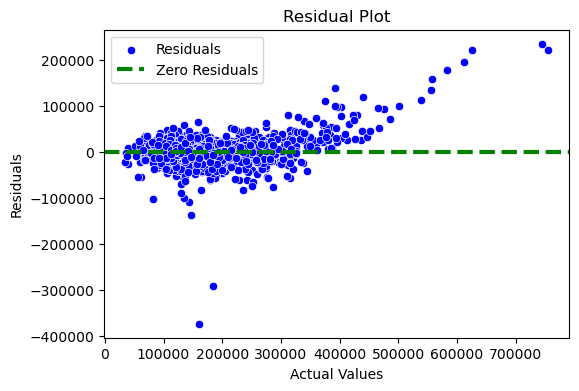

In [172]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train, y=(y_train - ypred_train_lr), color='blue', label='Residuals')
plt.axhline(y=0, color='green', linestyle='--', linewidth=3, label='Zero Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

### Distribution of residuals

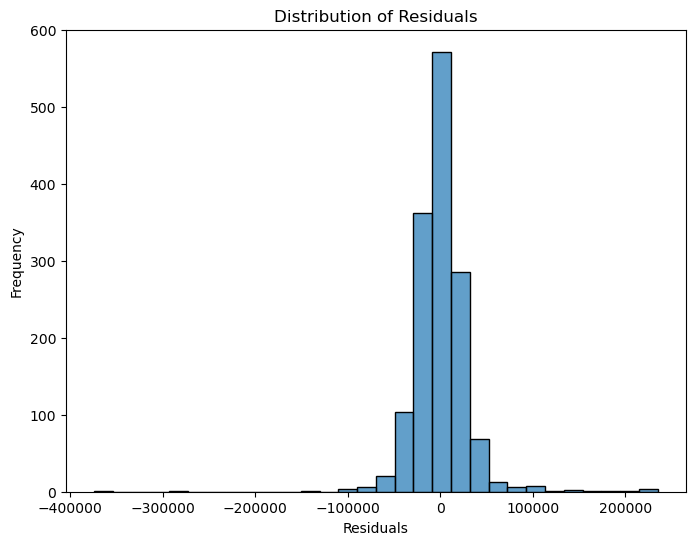

In [173]:
plt.figure(figsize=(8, 6))
sns.histplot(y_train - ypred_train_lr, bins=30, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

### Actual vs predicted

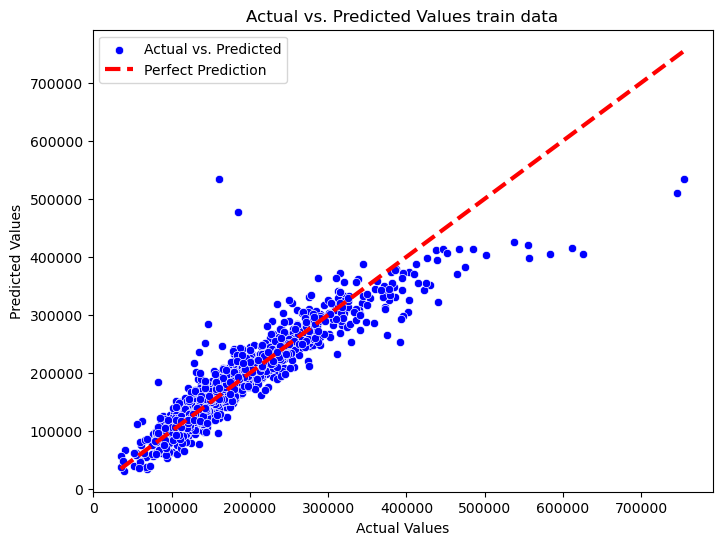

In [174]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train,y=ypred_train_lr, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=3, 
         label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values train data')
plt.legend()
plt.show()